In [2]:
import model
import numpy as np
from scipy.stats import linregress
from matplotlib import pyplot as plt

""" Basic run of the model with degrees over time """


network = model.network()
network.set_fitness_distr('uniform')
size = 1000
G = network.generate_network(size)

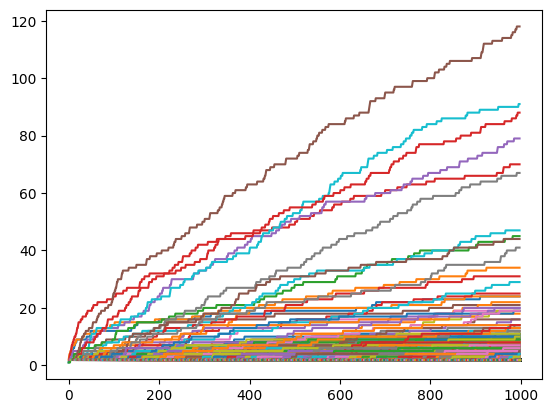

In [5]:
node_degrees = []
times = []
for i in range(size):
    k, t = network.get_degree_wrt_time(i)
    node_degrees.append(k)
    times.append(t)

for i in range(len(times)):
    plt.plot(times[i], node_degrees[i])

In [6]:
""" model ran with a custom fitness distribution from data """

network2 = model.network()
size = 1000

#fitness_data = [1 for i in range(size)]

rng = np.random.default_rng(1234)
fitness_data = rng.random(size)
#fitness_data = rng.exponential(2.0, size)

network2.generator.fitness_data = fitness_data

G = network2.generate_network(size, from_data=True)

Text(0.5, 1.0, 'Fitness Distribution')

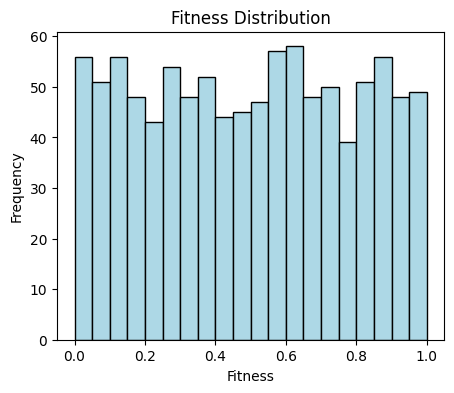

In [72]:
import matplotlib.pyplot as plt

data = G

fitness_values = [fitness for _, (_, fitness) in data.items()]

plt.figure(figsize=(5,4))
plt.hist(fitness_values, bins=20, color='lightblue', edgecolor='black')
plt.xlabel("Fitness")
plt.ylabel("Frequency")
plt.title("Fitness Distribution")

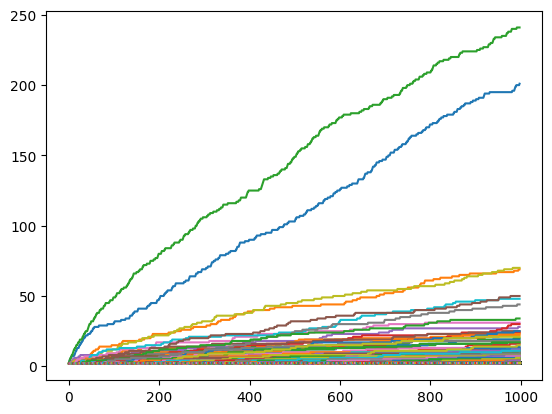

In [7]:
node_degrees = []
times = []
for i in range(size):
    k, t = network2.get_degree_wrt_time(i)
    node_degrees.append(k)
    times.append(t)

for i in range(len(times)):
    plt.plot(times[i], node_degrees[i])

In [8]:
""" some additional functions for generating averaged plots """

def get_node_degrees(net, size):
    node_degrees = []
    times = []
    for i in range(size):
        k, t = net.get_degree_wrt_time(i)
        node_degrees.append(k)
        times.append(t)

    return times, node_degrees

def simulate(size, iterations, fitness):
    node_degrees = []
    times = []

    for i in range(iterations):
        network = model.network()
        network.set_fitness_from_data(fitness)
        network.generate_network(size, from_data=True)
        
        t, k = get_node_degrees(network, size)
        node_degrees.append(k)
        times.append(t)

    return times, node_degrees

def clone_shape(arr):
    res = []
    for x in arr:
        res.append(np.zeros_like(x))
    return res

def get_means(arr):
    summ = clone_shape(arr[0])
    for i in range(len(arr)):
        for j in range(len(arr[i])):
            for k in range(len(arr[i][j])):
                summ[j][k] += arr[i][j][k]

    means = [[value / len(arr) for value in subarr] for subarr in summ]

    return means

    

In [19]:
""" averaging 20 runs with 5000 time points each for exponential fitness distr"""

size = 5000
iterations = 20
rng = np.random.default_rng(1234)
fitness_data = rng.exponential(1.0,size)

times, node_degrees = simulate(size, iterations, fitness_data)

mean_degrees = get_means(node_degrees)

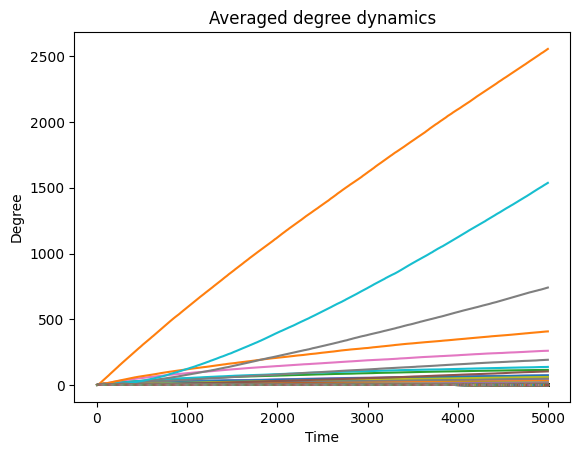

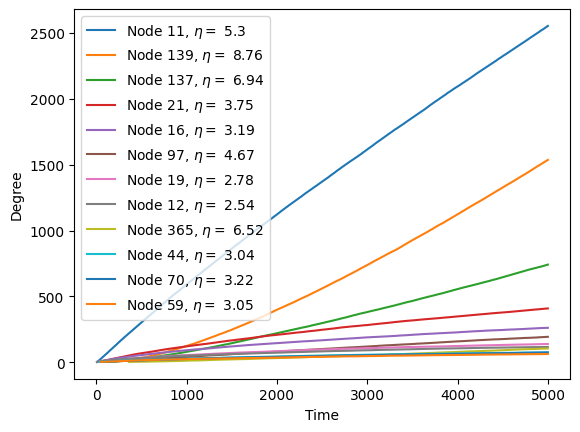

In [20]:
for i in range(len(mean_degrees)):
    plt.plot(times[0][i], mean_degrees[i])

plt.xlabel('Time')
plt.ylabel('Degree')
plt.title(f'Averaged degree dynamics')

# plotting only nodes with high degree
end_time_degrees = [mean_degrees[node][-1] for node in range(size)]
top_nodes = sorted(range(size), key=lambda x: end_time_degrees[x], reverse=True)[:12]

plt.figure()
for node in top_nodes:
    plt.plot(times[0][node], mean_degrees[node], label=f'Node {node}')

legend_labels = [f'Node {node}, $\eta = $ {np.round(fitness_data[node],2)}' for node in top_nodes]

plt.legend(legend_labels)
plt.xlabel('Time')
plt.ylabel('Degree')
plt.show()

In [21]:
""" the same but for uniform distr"""

size = 5000
iterations = 20
rng = np.random.default_rng(1234)
fitness_data = rng.random(size)

times, node_degrees = simulate(size, iterations, fitness_data)

mean_degrees = get_means(node_degrees)

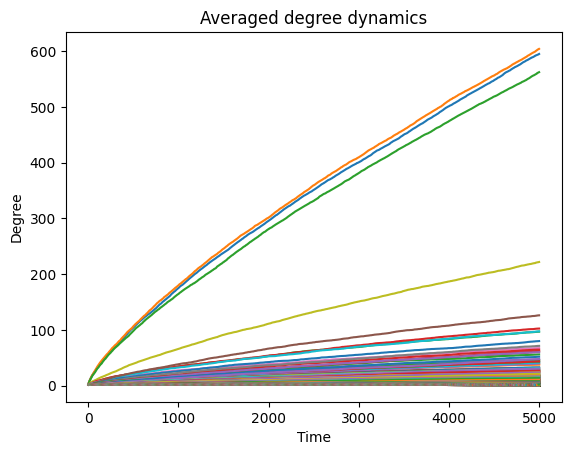

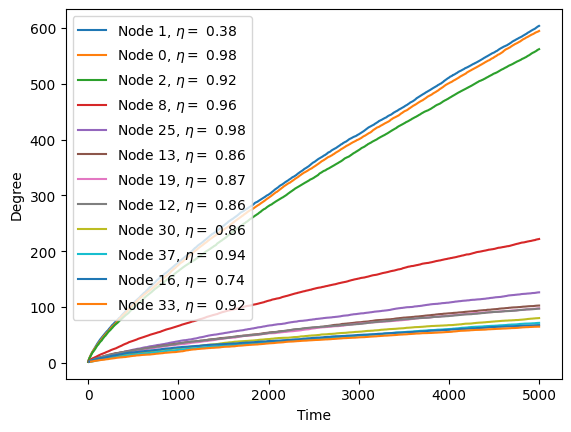

In [22]:
for i in range(len(mean_degrees)):
    plt.plot(times[0][i], mean_degrees[i])

plt.xlabel('Time')
plt.ylabel('Degree')
plt.title(f'Averaged degree dynamics')

# plotting only nodes with high degree
end_time_degrees = [mean_degrees[node][-1] for node in range(size)]
top_nodes = sorted(range(size), key=lambda x: end_time_degrees[x], reverse=True)[:12]

plt.figure()
for node in top_nodes:
    plt.plot(times[0][node], mean_degrees[node], label=f'Node {node}')

legend_labels = [f'Node {node}, $\eta = $ {np.round(fitness_data[node],2)}' for node in top_nodes]

plt.legend(legend_labels)
plt.xlabel('Time')
plt.ylabel('Degree')
plt.show()